In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.ticker import FormatStrFormatter

# ЗАГРУЗКА ДАТАСЕТА ВИЗИТОВ (df_sessions)

In [2]:
df_sessions = pd.read_csv('ga_sessions.csv')
df_sessions

C:\Users\Ekaterina\AppData\Local\Temp\ipykernel_5104\1569105054.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sessions = pd.read_csv('ga_sessions.csv')


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,NaN,NaN,1920x1080,Chrome,Russia,Moscow
1860038,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,390x844,Safari,Russia,Stavropol
1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,375x667,Safari,Russia,Moscow
1860040,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk


## Информация о датасете визитов

In [3]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


In [4]:
def print_useful_rows_info(df):
    print('Количество полностью заполненных объектов: ', len(df.dropna()))
    print('Процент полностью заполненных объектов: ', round(len(df.dropna())/len(df) * 100, 2))
    missing_values = ((df.isna().sum() / len(df)) * 100).sort_values(ascending = False)
    print('Список признаков с пропущенными значениями: ', missing_values[missing_values.values > 0].index.tolist())

In [5]:
print_useful_rows_info(df_sessions)

Количество полностью заполненных объектов:  14940
Процент полностью заполненных объектов:  0.8
Список признаков с пропущенными значениями:  ['device_model', 'utm_keyword', 'device_os', 'device_brand', 'utm_adcontent', 'utm_campaign', 'utm_source']


## Матрица пропусков

<Axes: >

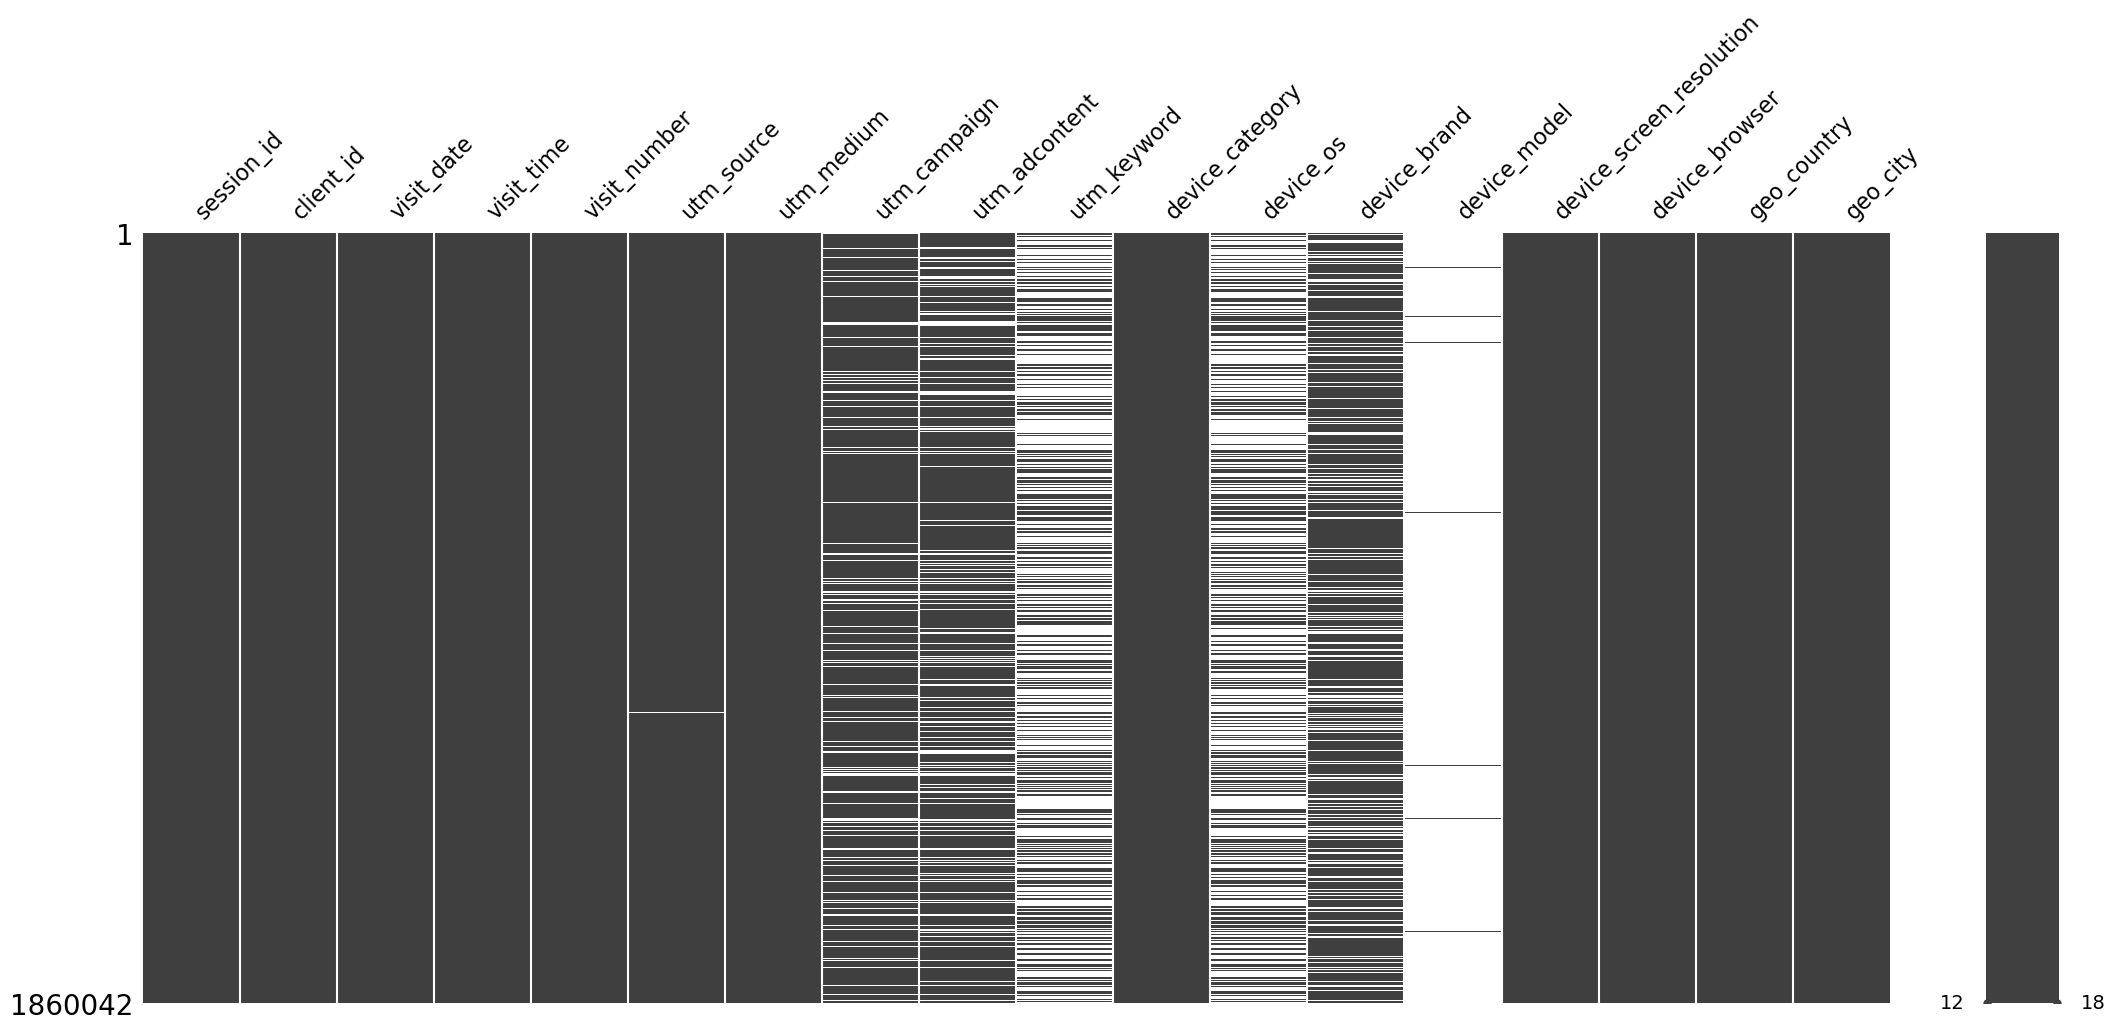

In [6]:
# матрица пропусков
msno.matrix(df_sessions)

### Просмотр значений признаков и их количества

Тип привлечения клиентов (utm_medium):

In [7]:
df_sessions.utm_medium.value_counts(dropna=False)

banner               552272
cpc                  434794
(none)               300575
cpm                  242083
referral             152050
organic               63034
email                 29240
push                  28035
stories               10582
cpv                    8022
blogger_channel        8015
smartbanner            6794
blogger_stories        4312
cpa                    4279
tg                     4011
app                    2836
post                   2326
smm                    1985
outlook                1332
clicks                  934
blogger_header          771
(not set)               480
info_text               343
sms                     239
landing                 134
partner                  97
fb_smm                   66
vk_smm                   65
link                     57
cbaafe                   47
CPM                      40
yandex_cpc               36
ok_smm                   28
static                   22
google_cpc               20
article             

Тип устройства:

In [8]:
df_sessions.device_category.value_counts(dropna=False)

mobile     1474871
desktop     366863
tablet       18308
Name: device_category, dtype: int64

Страна и город

In [9]:
df_sessions.geo_country.value_counts(dropna=False)

Russia                 1800565
United States            11784
Ukraine                   9012
Ireland                   4034
Belarus                   3636
                        ...   
Zambia                       1
Malawi                       1
Réunion                      1
Barbados                     1
Congo - Brazzaville          1
Name: geo_country, Length: 166, dtype: int64

In [10]:
df_sessions.geo_city.value_counts(dropna=False)

Moscow              805329
Saint Petersburg    296788
(not set)            78172
Yekaterinburg        35788
Krasnodar            32243
                     ...  
Sherbrooke               1
Albion                   1
Bornheim                 1
Huntley                  1
Sommerda                 1
Name: geo_city, Length: 2548, dtype: int64

Проверка наличия дубликатов

In [11]:
df_sessions[df_sessions.duplicated()]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city


Дубликатов нет

## Data Cleaning (датасет визитов(df_s))

In [12]:
df_s = df_sessions.copy()

Очистка датасета от избыточной информации

In [13]:
df_s = df_s.drop(columns = ['client_id',
                            'visit_date', 
                            'visit_time',
                            'utm_adcontent',
                            'utm_keyword',
                            'device_os',
                            'device_brand',
                            'device_model',
                            'device_screen_resolution', 
                            'device_browser',
                            'geo_country'], axis=1)

Матрица пропусков в значениях:

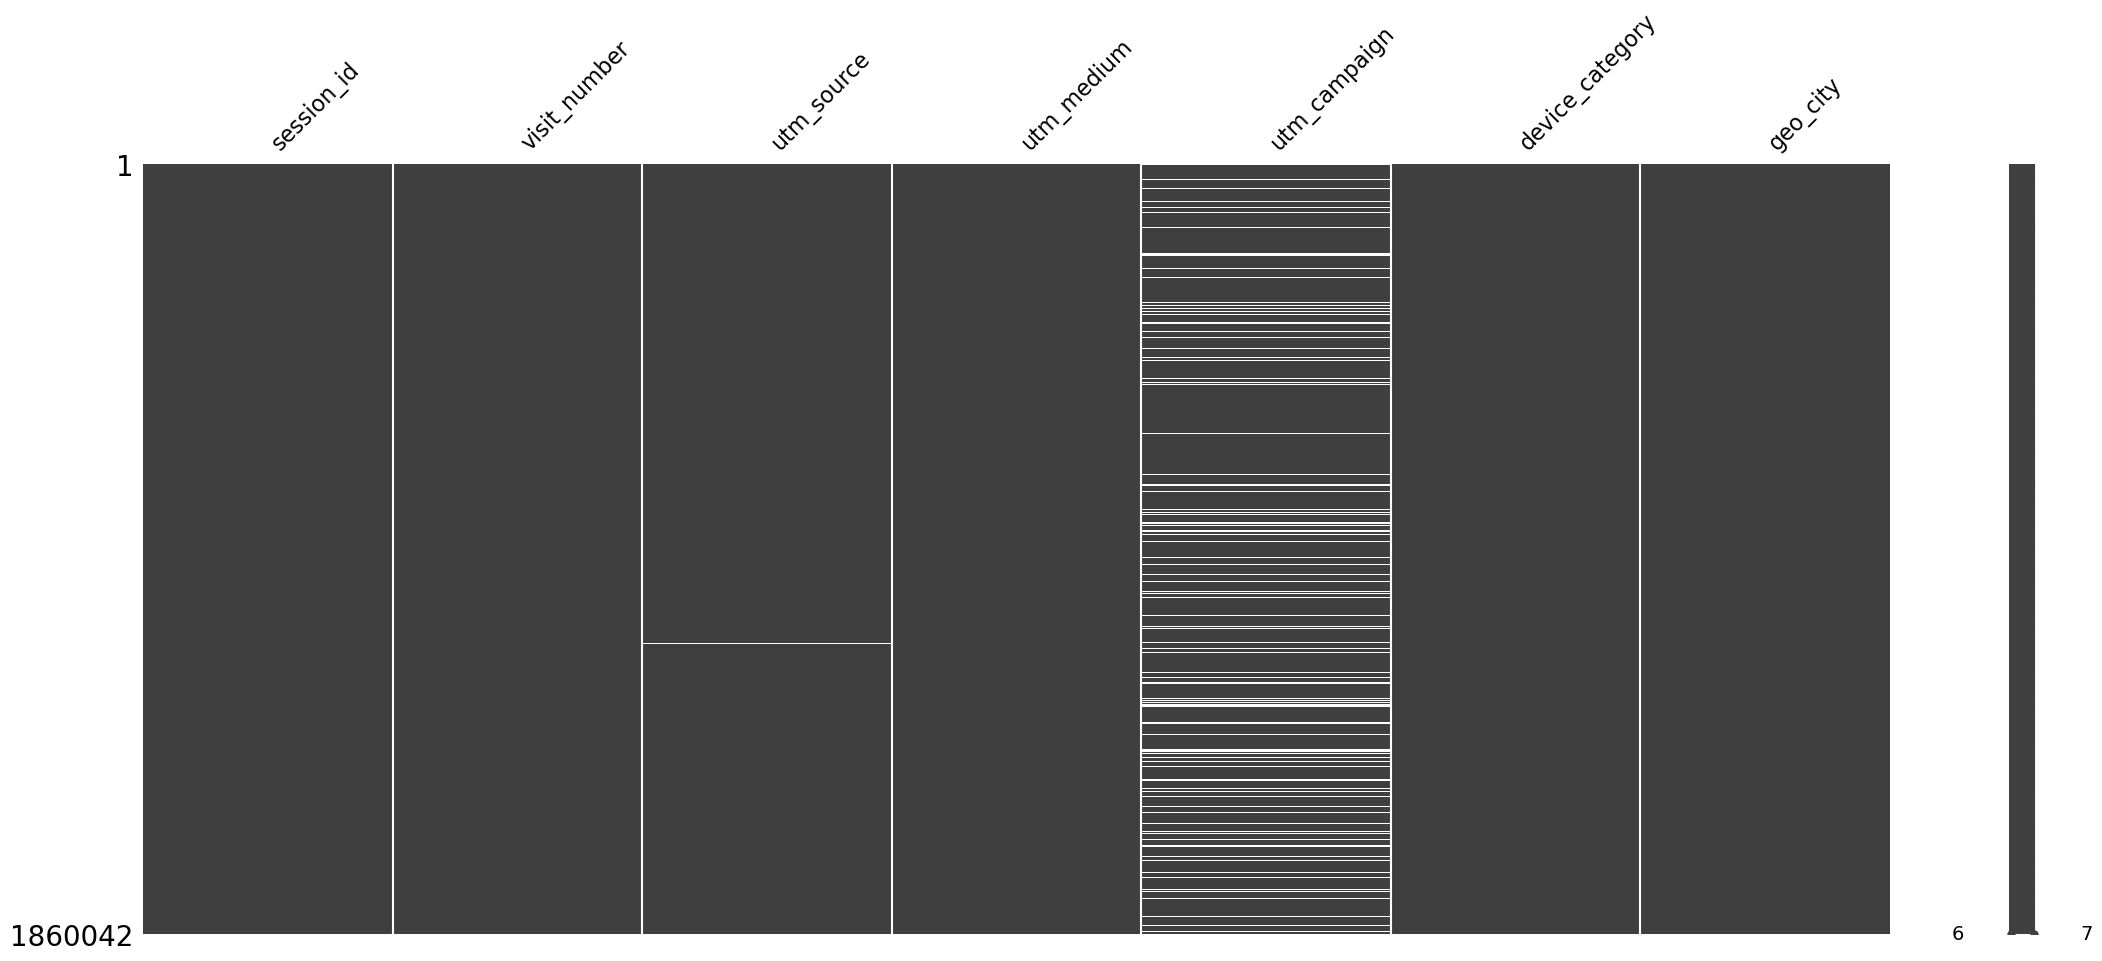

In [14]:
msno.matrix(df_s);

Признак 'utm_source': замена пустых значений на значение 'other'

In [15]:
df_s.utm_source.isna().sum()

97

In [16]:
df_s.utm_source = df_s.utm_source.fillna('other')

Признак 'utm_campaign': замена пустых значений на значение 'other'

In [17]:
df_s.utm_campaign.value_counts(dropna=False)

LTuZkdKfxRGVceoWkVyg    463481
LEoPHuyFvzoNfnzGgfcd    324044
FTjNLDyTrXaWYgZymFkV    247360
NaN                     219603
gecBYcKZCPMcVYdSSzKP    134042
                         ...  
RkpOyeEPgcMBSDuHLQcj         1
pcvPxfVFaAmhwFmvIeYd         1
qPDTdivQVeflLjTYIJnG         1
MHdHrBKQwbDaRalwnlJq         1
cXxuwXPoQCvAXPHpFcZl         1
Name: utm_campaign, Length: 413, dtype: int64

In [18]:
df_s.utm_campaign = df_s.utm_campaign.fillna('other')

Признак 'device_brand': замена пустых значений на значение 'other'

In [19]:
print_useful_rows_info(df_s)

Количество полностью заполненных объектов:  1860042
Процент полностью заполненных объектов:  100.0
Список признаков с пропущенными значениями:  []


Создание признака 'traffic' для разделения его на 2 категории: 
- органический - ['organic','referral','(none)']
- платный - (все остальное)

In [20]:
df_s['traffic'] = df_s['utm_medium'].apply(lambda x: 'organic' if x in ['organic','referral', '(none)'] else 'paid')

In [21]:
df_s = df_s.drop(columns=['utm_medium'], axis=1)

Разделение географического признака на 'capital' и 'other'

In [22]:
capital = ['Avsyunino', 'Andreevka', 'Aprelevka', 'Arkhangelskoe', 'Ateptsevo', 'Ashukino', 'Balashikha', 'Barvikha', 'Beloozersky', 'Biocombinat',
      'Bolshoye', 'Bunkovo', 'Bronnitsy', 'Bykovo', 'Vereya', 'Verbilki', 'Vidnoe', 'Vinogradovo', 'Vlasikha', 'Vniissok', 'Vnukovo', 'Volokolamsk',
      'Vorovsky', 'Voskresensk', 'Vysokovsk', 'Gzhel', 'Glebovsky', 'Golitsyno', 'Gorki', 'Davydovo', 'Dedenevo', 'Dedovsk', 'Demikhovo', 'Dzerzhinsky',
      'Dmitrov', 'Dolgoprudny', 'Domodedovo', 'Dorokhovo', 'Drezna', 'Dubna', 'Yegoryevsk', 'Zhavoronki', 'Zheleznodorozhny', 'Zhilevo', 'Zhukovsky', 
      'Zagoryansky', 'Zaprudnya', 'Zaraysk', 'Zvezdny Gorodok', 'Zvenigorod', 'Zelenograd', 'Ivanteevka', 'Iksha', 'Ilyinsky', 'Istra', 'Kalininets', 'Kapustino', 
      'Kashira','Klimovsk', 'Klin', 'Kokoshkino', 'Kolomna', 'Kolyubakino', 'Kommunarka', 'Konobeevo', 'Korolev', 'Kostrovo', 'Kotelniki', 'Kraskovo', 
      'Krasnoarmeysk', 'Krasnogorsk', 'Krasnozavodsk', 'Krasnoznamensk', 'Kratovo', 'Kubinka', 'Kudinovo', 'Kuznetsy', 'Kurovskoe', 'Lesnoy Gorodok',
      'Likino-Dulevo', 'Litvinovo', 'Lobnya', 'Losino-Petrovsky', 'Lotoshino', 'Lukhovitsy', 'Lytkarino', 'Lvovsky', 'Lyubertsy', 'Lyubuchany',
      'Malakhovka', 'Malino', 'Marfino', 'Mendeleevo', 'Mitino', 'Mikhnevo', 'Mozhaisk', 'Molodezhny', 'Monino', 'Moscow', 'Moscowsky', 'Mytishchi',
      'Naro-Fominsk', 'Nakhabino', 'Nekrasovsky', 'Nesterovo', 'Novopetrovskoe', 'Novosinkovo', 'Novy Gorod', 'Noginsk', 'Obolensk', 'Obukhovo', 
      'Odintsovo', 'Ozherelie', 'Ozery', 'Oktiabrsky', 'Orekhovo-Zuevo', 'Ostashevo', 'Otradnoe', 'Ostrovtsy', 'Pavlovskaya Sloboda', 'Pavlovsky Posad',
      'Peresvet', 'Pirogovo', 'Povarovo', 'Podolsk', 'Pravdinsky', 'Proletarsky', 'Protvino', 'Putilkovo', 'Pushkino', 'Pushchino', 'Ramenskoye', 
      'Rastunovo', 'Remmash', 'Reutov', 'Rogachevo', 'Rodniki', 'Rozhdestveno', 'Roshal', 'Ruza', 'Sverdlovsky', 'Selyatino', 'Sergiev Posad', 
      'Serebrynye Prudy', 'Serpukhov', 'Snegiri','Solnechnogorsk', 'Solntsevo', 'Sofrino','Staraya Kupavna', 'Stary Gorodok', 'Stolbovaya',
      'Stupino', 'Sychevo', 'Shodnya', 'Taldom', 'Taraskovo', 'Tomilino', 'Troitsk', 'Troitskoe', 'Tuchkovo', 'Uvarovka', 'Udelnaya', 'Uzunovo',
      'Fryazevo', 'Fryazino', 'Fryanovo', 'Khimki', 'Khotkovo', 'Chastsy', 'Chernogolovka', 'Chekhov', 'Shatura', 'Shaturtorf', 'Shakhovskaya', 
      'Shchelkovo', 'Shcherbinka', 'Elektrogorsk', 'Elektrostal', 'Elektrougli', 'Ubileyny', 'Yakhroma', 'Saint Petersburg']

In [23]:
df_s['geo_city'] = df_sessions['geo_city'].apply(lambda x: 'capital' if x in capital else 'other')

In [24]:
df_s.geo_city.value_counts()

capital    1197897
other       662145
Name: geo_city, dtype: int64

In [25]:
df_s['utm_source'] = df_sessions['utm_source'].apply(lambda x: 'social_network' if x in 
                                                          [
                                                            'QxAxdyPLuQMEcrdZWdWb', 
                                                            'MvfHsxITijuriZxsqZqt', 
                                                            'ISrKoXQCxqqYvAZICvjs',
                                                            'IZEXUFLARCUMynmHNBGo', 
                                                            'PlbkrSYoHuZBWfYjYnfw',
                                                            'gVRrcxiDQubJiljoTbGm'
                                                        ]
                                                                                      else 'other_source')

In [26]:
df_s.utm_source.value_counts()

other_source      1585815
social_network     274227
Name: utm_source, dtype: int64

In [27]:
df_s

,session_id,visit_number,utm_source,utm_campaign,device_category,geo_city,traffic
0,9055434745589932991.1637753792.1637753792,1,other_source,LEoPHuyFvzoNfnzGgfcd,mobile,other,paid
1,905544597018549464.1636867290.1636867290,1,social_network,FTjNLDyTrXaWYgZymFkV,mobile,capital,paid
2,9055446045651783499.1640648526.1640648526,1,other_source,LEoPHuyFvzoNfnzGgfcd,mobile,other,paid
3,9055447046360770272.1622255328.1622255328,1,other_source,other,mobile,capital,paid
4,9055447046360770272.1622255345.1622255345,2,other_source,other,mobile,capital,paid
...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,1,other_source,other,desktop,capital,paid
1860038,9055421130527858185.1622007305.1622007305,1,other_source,LTuZkdKfxRGVceoWkVyg,mobile,other,organic
1860039,9055422955903931195.1636979515.1636979515,1,other_source,LTuZkdKfxRGVceoWkVyg,mobile,capital,organic
1860040,905543020766873816.1638189404.1638189404,1,other_source,LEoPHuyFvzoNfnzGgfcd,mobile,other,paid


### Распределение ключевых атрибутов 

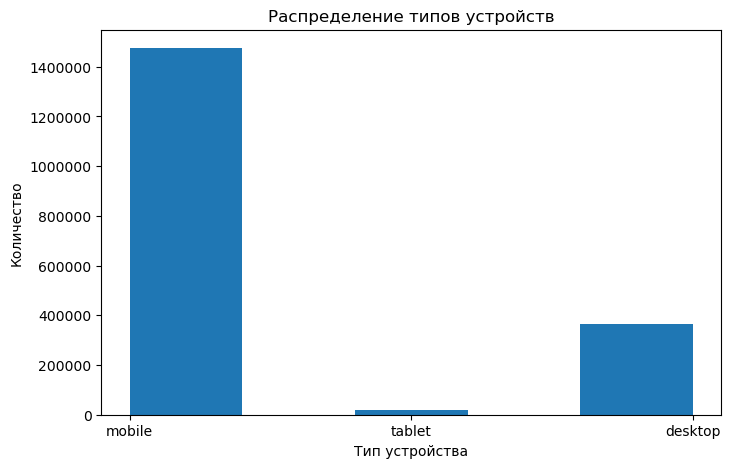

In [28]:
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(df_s.device_category, bins=5)
ax.set_xlabel('Тип устройства')
ax.set_ylabel('Количество')
ax.set_title('Распределение типов устройств')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'));

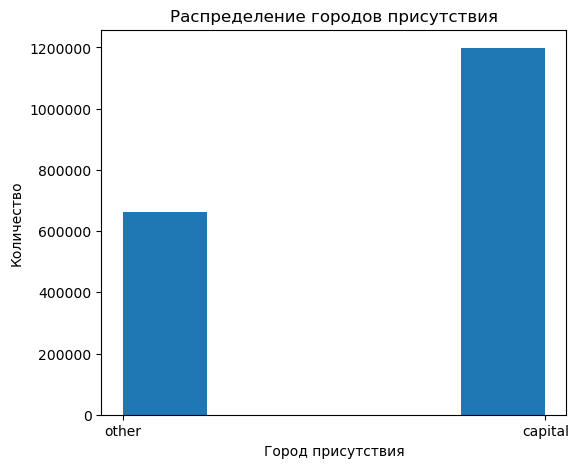

In [29]:
fig, ax = plt.subplots(figsize=(6,5))
ax.hist(df_s.geo_city, bins=5)
ax.set_xlabel('Город присутствия')
ax.set_ylabel('Количество')
ax.set_title('Распределение городов присутствия')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'));

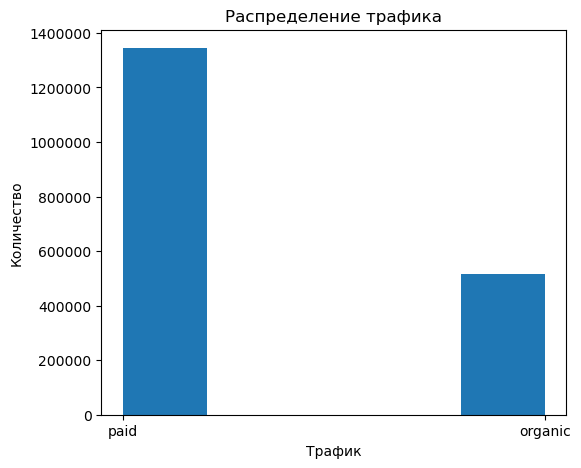

In [30]:
fig, ax = plt.subplots(figsize=(6,5))
ax.hist(df_s.traffic, bins=5)
ax.set_xlabel('Трафик')
ax.set_ylabel('Количество')
ax.set_title('Распределение трафика')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'));

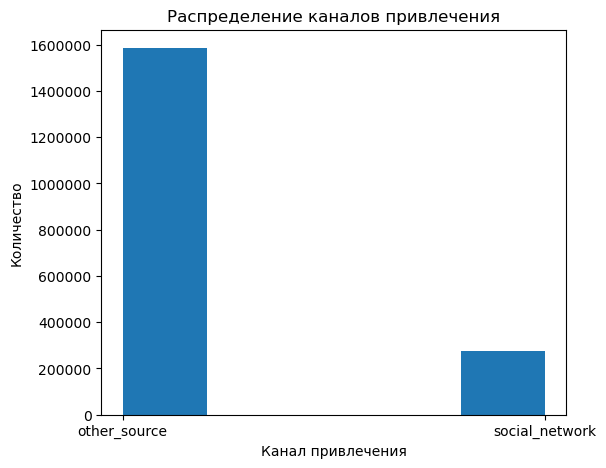

In [31]:
fig, ax = plt.subplots(figsize=(6,5))
ax.hist(df_s.utm_source, bins=5)
ax.set_xlabel('Канал привлечения')
ax.set_ylabel('Количество')
ax.set_title('Распределение каналов привлечения')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'));

# ЗАГРУЗКА ДАТАСЕТА СОБЫТИЙ (df_hits)

In [32]:
df_hits = pd.read_csv('ga_hits-002.csv')
df_hits

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23,810589.0,43,event,NaN,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz,quiz_show,NaN,NaN
15726466,7310304587364460692.1640261783.1640261783,2021-12-23,904927.0,40,event,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz,quiz_show,NaN,NaN
15726467,8013702685784312179.1640270195.1640270195,2021-12-23,2172865.0,43,event,NaN,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz,quiz_show,NaN,NaN
15726468,8021505554734405918.1640257821.1640257821,2021-12-23,713325.0,45,event,NaN,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz,quiz_show,NaN,NaN


## Информация о датасете событий

In [33]:
df_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


In [34]:
print_useful_rows_info(df_hits)

Количество полностью заполненных объектов:  0
Процент полностью заполненных объектов:  0.0
Список признаков с пропущенными значениями:  ['event_value', 'hit_time', 'hit_referer', 'event_label']


## Матрица пропусков

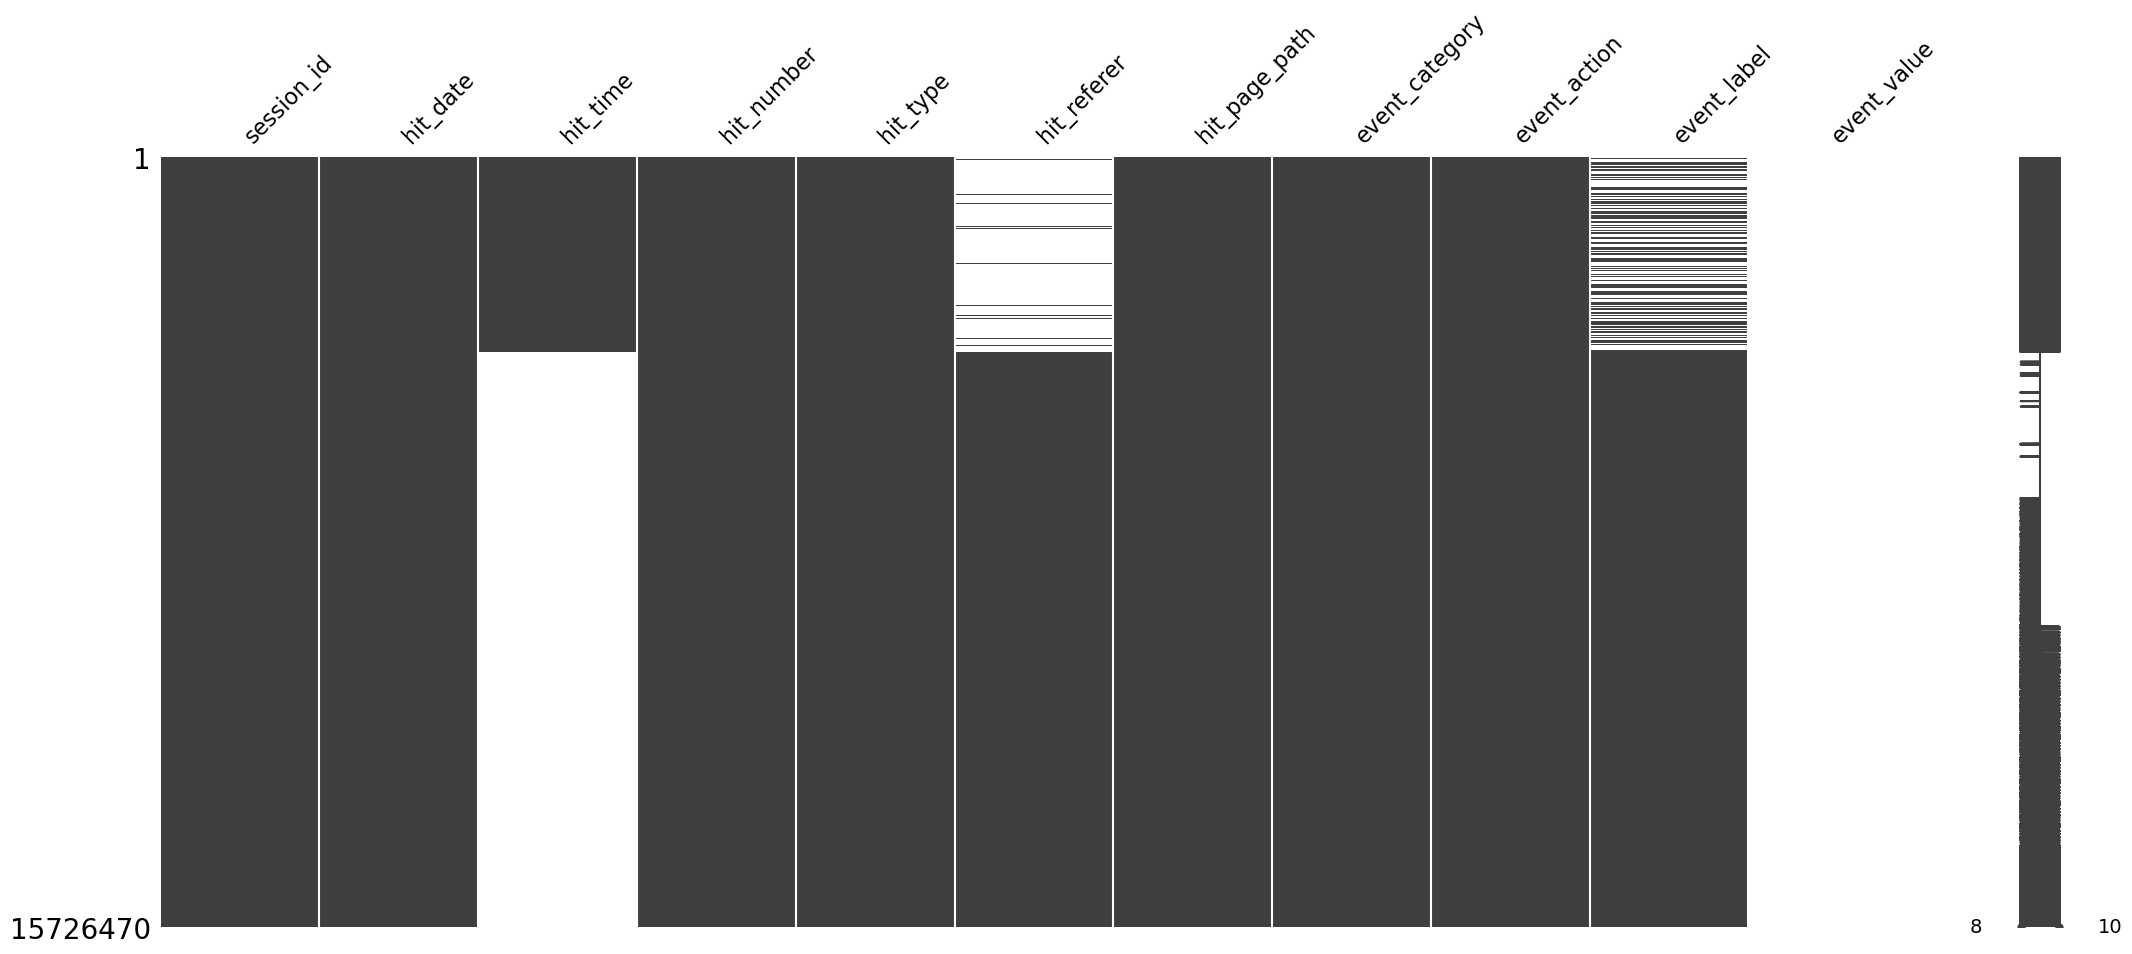

In [35]:
msno.matrix(df_hits);

### Просмотр значений признаков и их количества

Просмотр времени событий:

In [36]:
df_hits.hit_time.value_counts(dropna=False)

NaN          9160322
0.0            41137
1.0            18522
2.0            10101
3.0             6060
              ...   
544067.0           1
698726.0           1
609006.0           1
1200872.0          1
742820.0           1
Name: hit_time, Length: 925888, dtype: int64

Просмотр типов события

In [37]:
df_hits.hit_type.value_counts(dropna=False)

event    15726470
Name: hit_type, dtype: int64

Просмотр источников событий:

In [38]:
df_hits.hit_referer.value_counts(dropna=False)

HbolMJUevblAbkHClEQa    8879187
NaN                     6274804
FwdMTcXzWAwhtsnMAbhS      91940
sAGDBCdeVPmQPwkVEcIX      53565
GQmOLxANuSeCxCanBpMl      35470
                         ...   
VaOgrsicGpgIbzLNSDbc          1
rSeuBRLEcgyWsXrSYQqh          1
UNckxKWlzUxsKgvMBNdE          1
YZNVwxZKSbzYIwrGrgdY          1
tvGabHlPFDvTmIFiCKTL          1
Name: hit_referer, Length: 37874, dtype: int64

Просмотр типов действия

In [39]:
df_hits.event_category.value_counts(dropna=False)

card_web                         7456998
search_form                      2423605
sub_page_view                    1986074
sub_button_click                 1073471
listing_ads                      1040468
cars                              358915
sap_search_form                   356596
quiz                              263134
auth                              189373
sap_search__form                  188129
jivosite                           88443
chat                               85007
ad_banner                          40441
offers                             31218
navigation                         27075
footer                             20297
sub_submit                         18495
greenday_sub_button_click          15425
main_banners                       14142
profile_menu                       13879
scrolling_main_page                12160
active_invitation                   8478
header                              3531
my_idea                             2319
greenday_listing

Просмотр действий

In [40]:
df_hits.event_action.value_counts(dropna=False)

view_card                     3558985
view_new_card                 3551009
sub_landing                   1798117
go_to_car_card                 973666
sub_view_cars_click            791515
                               ...   
click_on_android                    1
new_year_road_help_btn              1
titul_page_view                     1
show_pos_status_declined            1
survey_buy_after_sell_when          1
Name: event_action, Length: 230, dtype: int64

Просмотр тегов действия

In [41]:
df_hits.event_label.value_counts(dropna=False)

KclpemfoHstknWHFiLit    6505447
NaN                     3760184
hAHqGICPFQiPwtzubOzs    1284914
OHfyUfDKdPgBdvelDlfG     626554
pzAKUYdRKNEUXxxBFUPX     358915
                         ...   
iFTveknOEiHmdgIHHqBZ          1
WKfoFxrMANSjHQMIhCZr          1
RAJXTkPWctNbMZubUIng          1
jRptuMMybqHerOxplPYo          1
aNlmojNIfsJaXKZHCDiU          1
Name: event_label, Length: 39826, dtype: int64

## Data Cleaning (датасет событий (df_h))

In [42]:
df_h = df_hits.copy()

Очистка датасета от избыточной информации

In [43]:
df_h = df_h.drop(columns=['hit_date','hit_time','hit_number', 'hit_type', 'hit_referer','event_label', 'event_value', 'event_category'], axis=1)
df_h

,session_id,hit_page_path,event_action
0,5639623078712724064.1640254056.1640254056,sberauto.com/cars?utm_source_initial=google&ut...,quiz_show
1,7750352294969115059.1640271109.1640271109,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz_show
2,885342191847998240.1640235807.1640235807,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz_show
3,142526202120934167.1640211014.1640211014,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz_show
4,3450086108837475701.1640265078.1640265078,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz_show
...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz_show
15726466,7310304587364460692.1640261783.1640261783,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz_show
15726467,8013702685784312179.1640270195.1640270195,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz_show
15726468,8021505554734405918.1640257821.1640257821,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz_show


Матрица пропусков в значениях:

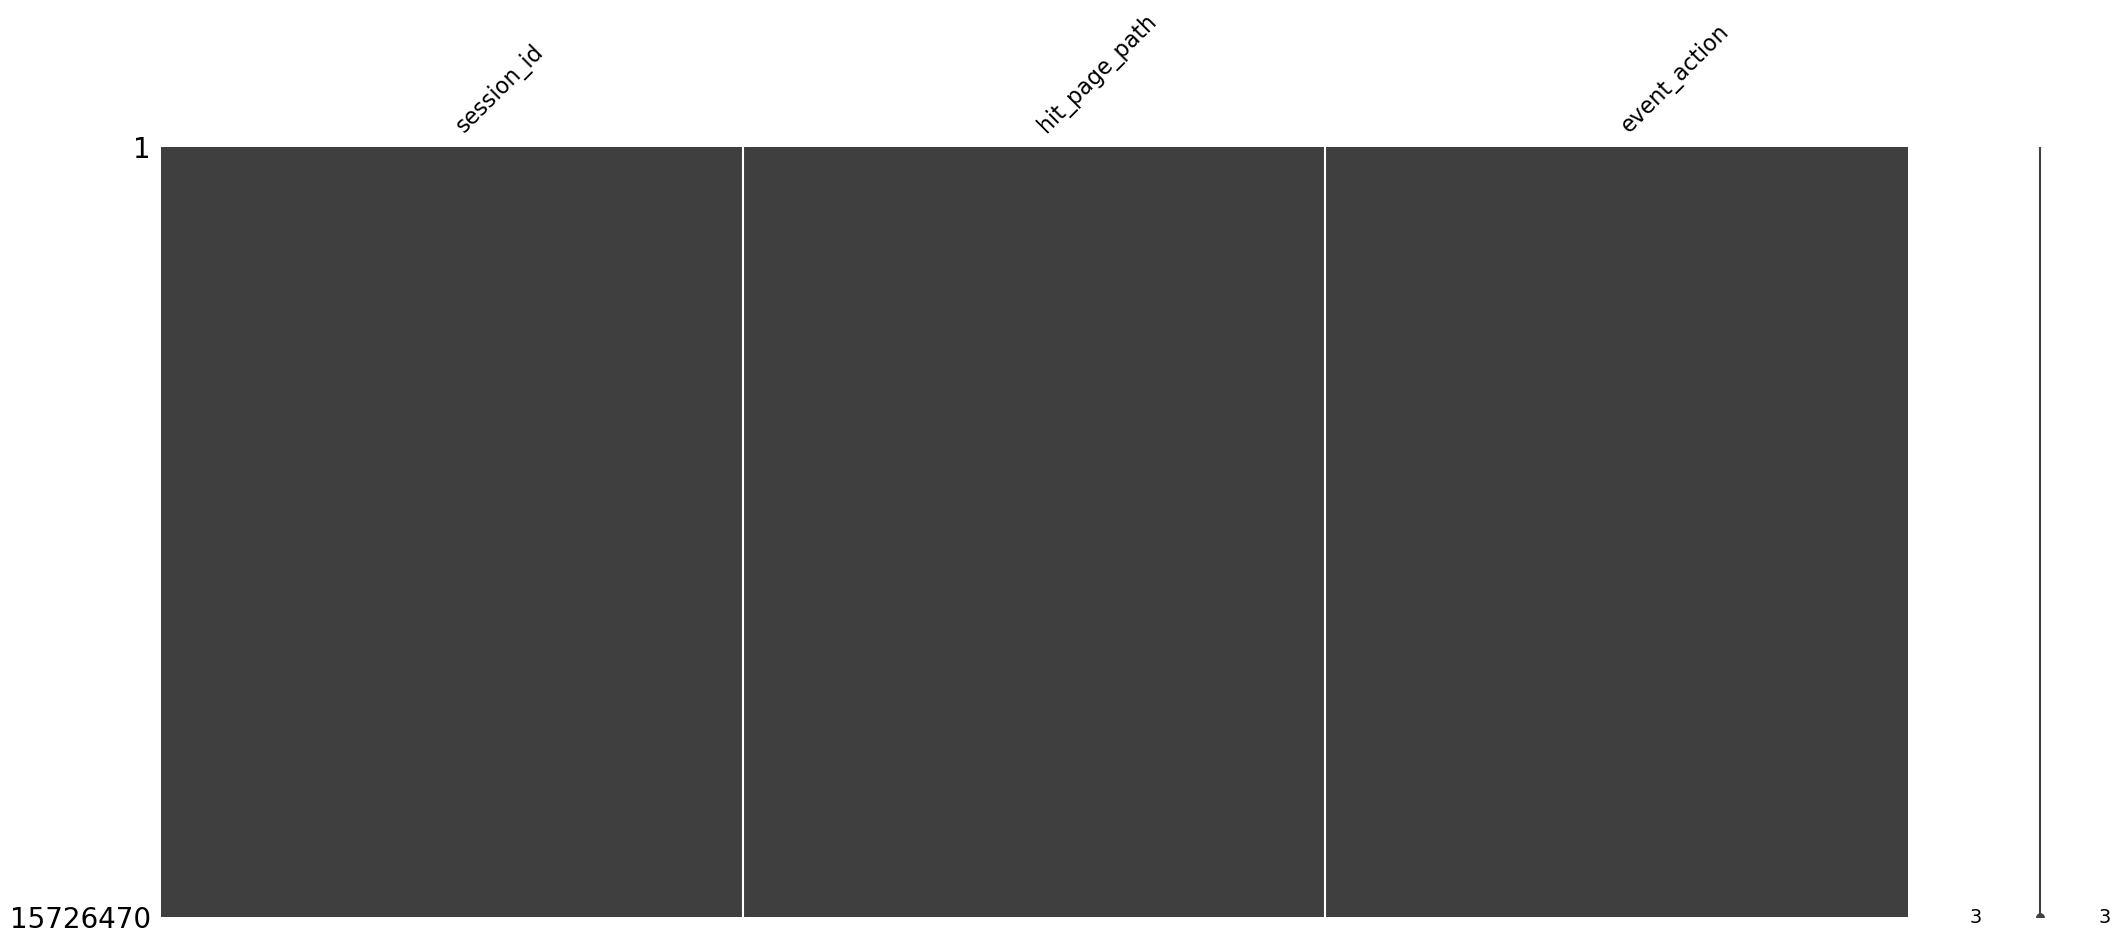

In [44]:
msno.matrix(df_h);

In [45]:
print_useful_rows_info(df_h)

Количество полностью заполненных объектов:  15726470
Процент полностью заполненных объектов:  100.0
Список признаков с пропущенными значениями:  []


Создание признака 'target_action', в котором будет отражаться совершил ли пользователь целевое действие: \
1 - совершил, 0 - не совершил

In [46]:
df_h['target_action'] = df_h['event_action'].apply(lambda x: 1 if x in [
                                                                        'sub_car_claim_click', 
                                                                        'sub_car_claim_submit_click',
                                                                        'sub_open_dialog_click',
                                                                        'sub_custom_question_submit_click',
                                                                        'sub_call_number_click', 
                                                                        'sub_callback_submit_click', 
                                                                        'sub_submit_success',
                                                                        'sub_car_request_submit_click'
                                                                        ]
                                                               else 0
)

In [47]:
df_h.target_action.value_counts()

0    15621562
1      104908
Name: target_action, dtype: int64

Поиск дубликатов:

In [48]:
df_h[df_h.duplicated()]

,session_id,hit_page_path,event_action,target_action
23,3117547552978670057.1640217454.1640217454,sberauto.com/cars/all/skoda/rapid/bf24b977?ren...,view_card,0
32,3282323002617677961.1640266499.1640266499,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,view_card,0
39,562366956183957396.1640246520.1640246520,sberauto.com/cars/all/mini/hatch/b82590a3?rent...,view_card,0
42,628849304731384746.1640233987.1640233987,sberauto.com/cars/all/skoda/rapid/bf24b977?ren...,view_card,0
61,2530706414478031710.1640233887.1640233887,sberauto.com/cars/all/nissan/qashqai/bfc21661?...,view_card,0
...,...,...,...,...
15726416,2445898965208837590.1640279515.1640279515,sberauto.com/cars/all/kia/sorento/c38179cb?utm...,photos,0
15726420,1279681186746345207.1640244983.1640244983,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,photos,0
15726421,1279681186746345207.1640244983.1640244983,sberauto.com/cars/all/renault/logan/8c3c73f2?u...,photos,0
15726429,2233243198661178069.1640255986.1640255986,sberauto.com/cars?utm_source_initial=outlook&u...,quiz_show,0


Удаление дубликатов из датасета:

In [49]:
df_h.drop_duplicates()

,session_id,hit_page_path,event_action,target_action
0,5639623078712724064.1640254056.1640254056,sberauto.com/cars?utm_source_initial=google&ut...,quiz_show,0
1,7750352294969115059.1640271109.1640271109,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz_show,0
2,885342191847998240.1640235807.1640235807,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz_show,0
3,142526202120934167.1640211014.1640211014,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz_show,0
4,3450086108837475701.1640265078.1640265078,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz_show,0
...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz_show,0
15726466,7310304587364460692.1640261783.1640261783,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz_show,0
15726467,8013702685784312179.1640270195.1640270195,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz_show,0
15726468,8021505554734405918.1640257821.1640257821,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz_show,0


Очищение датасета от избыточной информации:

In [50]:
df_h = df_h.drop(columns=['event_action'], axis=1)
df_h

,session_id,hit_page_path,target_action
0,5639623078712724064.1640254056.1640254056,sberauto.com/cars?utm_source_initial=google&ut...,0
1,7750352294969115059.1640271109.1640271109,sberauto.com/cars/fiat?city=1&city=18&rental_c...,0
2,885342191847998240.1640235807.1640235807,sberauto.com/cars/all/volkswagen/polo/e994838f...,0
3,142526202120934167.1640211014.1640211014,sberauto.com/cars?utm_source_initial=yandex&ut...,0
4,3450086108837475701.1640265078.1640265078,sberauto.com/cars/all/mercedes-benz/cla-klasse...,0
...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,0
15726466,7310304587364460692.1640261783.1640261783,sberauto.com/cars/all/mercedes-benz/gla-klasse...,0
15726467,8013702685784312179.1640270195.1640270195,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,0
15726468,8021505554734405918.1640257821.1640257821,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,0


Объединение датасетов для дальнейшего анализа

In [51]:
df = pd.merge(left=df_s, right=df_h.groupby('session_id')['target_action'].max(), on='session_id', how='inner')
df

,session_id,visit_number,utm_source,utm_campaign,device_category,geo_city,traffic,target_action
0,9055434745589932991.1637753792.1637753792,1,other_source,LEoPHuyFvzoNfnzGgfcd,mobile,other,paid,0
1,905544597018549464.1636867290.1636867290,1,social_network,FTjNLDyTrXaWYgZymFkV,mobile,capital,paid,0
2,9055446045651783499.1640648526.1640648526,1,other_source,LEoPHuyFvzoNfnzGgfcd,mobile,other,paid,0
3,9055447046360770272.1622255328.1622255328,1,other_source,other,mobile,capital,paid,0
4,9055447046360770272.1622255345.1622255345,2,other_source,other,mobile,capital,paid,0
...,...,...,...,...,...,...,...,...
1732261,9055415581448263752.1640159305.1640159305,1,other_source,other,desktop,capital,paid,0
1732262,9055421130527858185.1622007305.1622007305,1,other_source,LTuZkdKfxRGVceoWkVyg,mobile,other,organic,0
1732263,9055422955903931195.1636979515.1636979515,1,other_source,LTuZkdKfxRGVceoWkVyg,mobile,capital,organic,0
1732264,905543020766873816.1638189404.1638189404,1,other_source,LEoPHuyFvzoNfnzGgfcd,mobile,other,paid,0


# ПРОВЕРКА ГИПОТЕЗ

## 1

### H0: CR_organic = CR_paid (органический трафик не отличается от платного с точки зрения CR в целевые события)

In [52]:
df.target_action.value_counts()

0    1681952
1      50314
Name: target_action, dtype: int64

In [53]:
all_traffic = df.target_action.value_counts().sum()
all_traffic

1732266

In [54]:
utm_traffic = df.pivot_table(index='traffic', columns = 'target_action', aggfunc='size', fill_value=0)
utm_traffic

target_action,0,1
traffic,,
organic,448108,20812
paid,1233844,29502


Расчет CR для органического и платного трафика

In [55]:
CR_organic = round(utm_traffic[1][0]/all_traffic * 100, 2)
CR_paid = round(utm_traffic[1][1]/all_traffic * 100, 2)
print(f' CR органического трафика: {CR_organic}%, CR платного трафика: {CR_paid}%')

 CR органического трафика: 1.2%, CR платного трафика: 1.7%


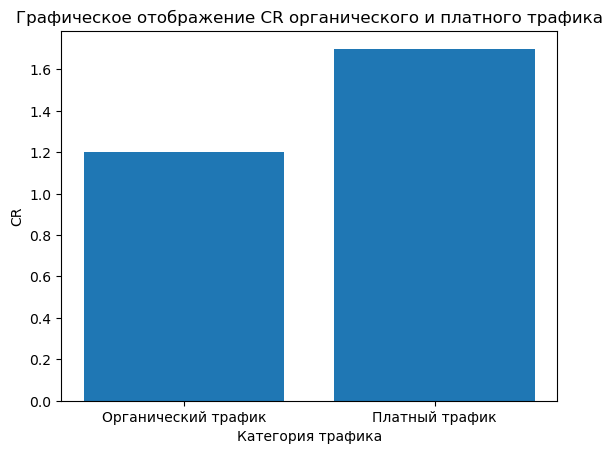

In [134]:
data = {'Органический трафик': 1.2, 'Платный трафик': 1.7}
plt.bar(data.keys(), data.values())
plt.xlabel('Категория трафика')
plt.ylabel('CR')
plt.title('Графическое отображение CR органического и платного трафика')
plt.show()

Исходя из полученных значений, CR органического и платного трафика равна 1.2 % и 1.7 %, соответственно, можно сделать вывод о том, что Н0 не подтверждается, т.к. эти показатели неравны. Конверсия платного трафика выше органического на 0,5 п.п.

## 2

### H0: CR_dekstop = CR_mobile = CR_tablet (трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR в целевые события)

In [106]:
utm_device = df.pivot_table(index='device_category', columns = 'target_action', aggfunc='size', fill_value=0)
utm_device

target_action,0,1
device_category,,
desktop,335378,11513
mobile,1330300,38379
tablet,16274,422


Расчет CR для трафика с разных типов устройств

In [107]:
CR_desktop = round(utm_device[1][0]/all_traffic * 100, 2)
CR_mobile = round(utm_device[1][1]/all_traffic * 100, 2)
CR_tablet = round(utm_device[1][2]/all_traffic * 100, 2)
print(f' CR трафика с дектопных устройств: {CR_desktop}%, CR трафика с мобильных устройств: {CR_mobile}%, CR трафика с планшетов:{CR_tablet}%')

 CR трафика с дектопных устройств: 0.66%, CR трафика с мобильных устройств: 2.22%, CR трафика с планшетов:0.02%


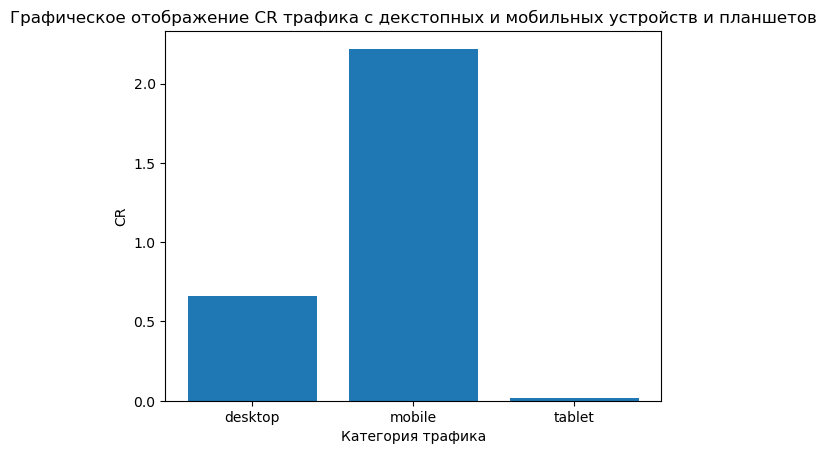

In [135]:
data_device = {'desktop': 0.66, 'mobile': 2.22, 'tablet': 0.02}
plt.bar(data_device.keys(), data_device.values())
plt.xlabel('Категория трафика')
plt.ylabel('CR')
plt.title('Графическое отображение CR трафика с декстопных и мобильных устройств и планшетов')
plt.show()

Исходя из полученных значений, CR трафика с декстопных и мобильных устройств и планшетов равна 0.66, 2.22 и 0.02 %, соответственно, можно сделать вывод о том, что Н0 не подтверждается, т.к. эти показатели неравны. Конверсия разных видов трафика отличается друг от друга, наибольшей конверсией обладают мобильные устройства.

# 3

### H0: CR_capital = CR_other (трафик из городов присутствия (Москва и область, Санкт-Петербург - capital) не отличается от трафика из иных регионов с точки зрения CR в целевые события.)

In [109]:
utm_city = df.pivot_table(index='geo_city', columns = 'target_action', aggfunc='size', fill_value=0)
utm_city

target_action,0,1
geo_city,,
capital,1085415,33465
other,596537,16849


Расчет CR для трафика из городов присутствия

In [110]:
CR_capital = round(utm_city[1][0]/all_traffic * 100, 2)
CR_other = round(utm_city[1][1]/all_traffic * 100, 2)
print(f' CR трафика городов присутствия: {CR_capital}%, CR трафика иных городов: {CR_other}%')

 CR трафика городов присутствия: 1.93%, CR трафика иных городов: 0.97%


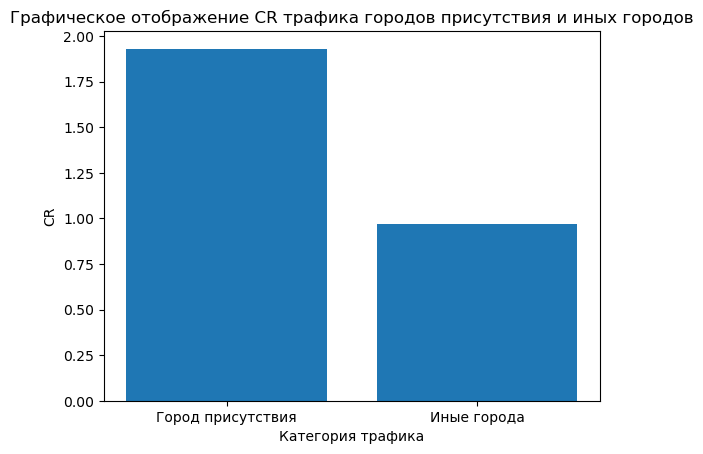

In [136]:
data_city = {'Город присутствия': 1.93, 'Иные города': 0.97}
plt.bar(data_city.keys(), data_city.values())
plt.xlabel('Категория трафика')
plt.ylabel('CR')
plt.title('Графическое отображение CR трафика городов присутствия и иных городов')
plt.show()

Исходя из полученных значений, CR трафика городов присутствия и иных городов равна 1.93 и 0.97 %, соответственно, можно сделать вывод о том, что Н0 не подтверждается, т.к. эти показатели неравны. Трафик из городов присутствия отличается от трафика из иных регионов с точки зрения CR в целевые события, трафик городов присутствия выше трафика из иных регионов почти на 1 п.п.

# Ответы на вопросы продуктовой команды

1. Из каких источников / кампаний / устройств / локаций к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?

Сводная таблица различных источников целевого трафика:

In [113]:
utm = df.pivot_table(columns='target_action', index=['utm_source','utm_campaign','device_category','geo_city'], aggfunc='size', fill_value=0)
utm.sort_values(by=[1], axis=0, ascending=False, inplace=False)[:20]

target_action                                                      0     1
utm_source     utm_campaign         device_category geo_city              
other_source   LTuZkdKfxRGVceoWkVyg mobile          capital   176907  7459
                                    desktop         capital    77737  4780
               LEoPHuyFvzoNfnzGgfcd mobile          capital   129138  4776
                                                    other     180469  4490
               LTuZkdKfxRGVceoWkVyg mobile          other      92568  3986
               other                mobile          capital   105748  3845
               gecBYcKZCPMcVYdSSzKP mobile          other      77727  2542
               LTuZkdKfxRGVceoWkVyg desktop         other      50099  2532
               other                desktop         capital    43467  1960
               gecBYcKZCPMcVYdSSzKP mobile          capital    49968  1944
social_network FTjNLDyTrXaWYgZymFkV mobile          capital   137674  1769
other_source   other                mobile          other      16790   526
               sbJRYgVfvcnqKJNDDYIr mobile          capital    16763   502
social_network other                mobile          capital     5142   392
other_source   other                desktop         other      12339   297
social_network FTjNLDyTrXaWYgZymFkV desktop         capital    28583   232
other_source   eimRuUrNhZLAYcwRrNXu mobile          capital     6566   227
               SgIUDYUKnyWHVowUOqid mobile          other       9571   225
               LwJZxKuWmvOhPsaCeRjG mobile          capital    10227   191
               XHNUiSKKGTEpSAlaVMFQ mobile          capital    12122   173

#### C точки зрения CR

Самый целевой трафик идет не из социальных сетей, из рекламной кампании - LTuZkdKfxRGVceoWkVyg, с мобильных устройств из городов присутствия. Из социальных сетей наиболее эффективна была рекламная кампания - FTjNLDyTrXaWYgZymFkV на мобильных устройствах из городов присутствия.

#### С точки зрения объема трафика

In [114]:
utm.sort_values(by=[0], axis=0, ascending=False, inplace=False)[:10]

target_action                                                      0     1
utm_source     utm_campaign         device_category geo_city              
other_source   LEoPHuyFvzoNfnzGgfcd mobile          other     180469  4490
               LTuZkdKfxRGVceoWkVyg mobile          capital   176907  7459
social_network FTjNLDyTrXaWYgZymFkV mobile          capital   137674  1769
other_source   LEoPHuyFvzoNfnzGgfcd mobile          capital   129138  4776
               other                mobile          capital   105748  3845
               LTuZkdKfxRGVceoWkVyg mobile          other      92568  3986
                                    desktop         capital    77737  4780
               gecBYcKZCPMcVYdSSzKP mobile          other      77727  2542
               LTuZkdKfxRGVceoWkVyg desktop         other      50099  2532
               gecBYcKZCPMcVYdSSzKP mobile          capital    49968  1944

Самый целевой трафик идет не из социальных сетей, из рекламных кампаний - LEoPHuyFvzoNfnzGgfcd с мобильных устройств не из городов присутствия. Из социальных сетей наиболее эффективна была рекламная кампания - FTjNLDyTrXaWYgZymFkV на мобильных устройствах из городов присутствия.

2. Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?

Создание признака - марка автомобиля('car_brand')

In [141]:
df_h['car_brand'] = df_h.hit_page_path.apply(lambda x: x.split('/')[3] if 'all' in x.split('/') else 'other')
df_h.car_brand

0                   other
1                   other
2              volkswagen
3                   other
4           mercedes-benz
                ...      
15726465           toyota
15726466    mercedes-benz
15726467           toyota
15726468              bmw
15726469              bmw
Name: car_brand, Length: 15726470, dtype: object

In [117]:
cars = df_h.pivot_table(index='car_brand', columns = 'target_action', aggfunc='size', fill_value=0)
cars

target_action,0,1
car_brand,,
audi,59869,166
bmw,194011,1393
haval,50956,582
honda,390,7
hyundai,18588,466
infiniti,193,18
kia,233535,2735
lada-vaz,398554,5356
land-rover,24826,46


Объем трафика на определенную марку автомобиля

In [118]:
cars['count'] = cars.sum(axis=1).astype(int)
cars.sort_values(by='count', ascending=False)

target_action,0,1,count
car_brand,,,
other,12238634,73021,12311655
skoda,736255,8261,744516
mercedes-benz,469876,2440,472316
volkswagen,412072,5056,417128
lada-vaz,398554,5356,403910
nissan,237315,1386,238701
kia,233535,2735,236270
bmw,194011,1393,195404
toyota,159177,1663,160840


#### C точки зрения объема трафика

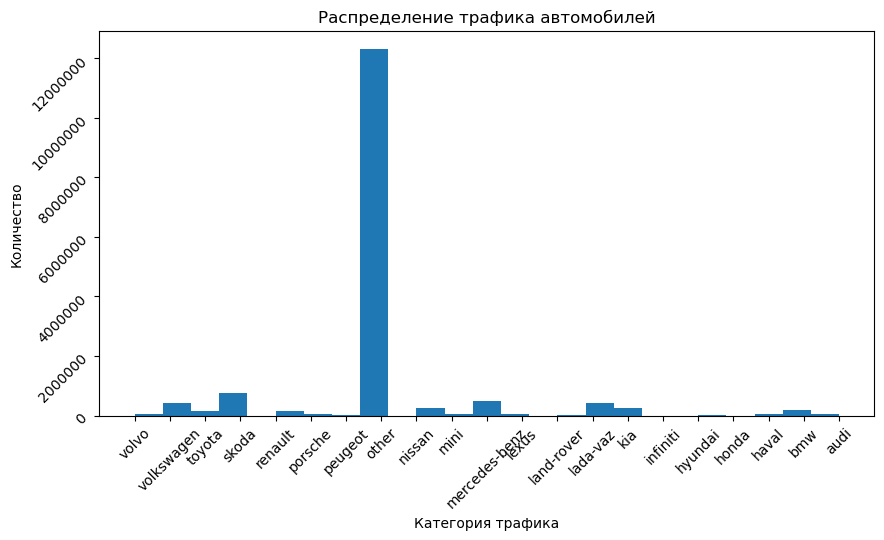

In [159]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(df_h.car_brand.sort_values(ascending=False), bins=25)
ax.set_xlabel('Категория трафика')
ax.tick_params(labelrotation=45)
ax.set_ylabel('Количество')
ax.set_title('Распределение трафика автомобилей')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'));

Наибольшим спросом пользуются автомобили марки 'Skoda', 'Mercedes-Benz' и 'Volkswagen'

#### C точки зрения CR

In [119]:
cars.sort_values(by=[1], ascending=False)

target_action,0,1,count
car_brand,,,
other,12238634,73021,12311655
skoda,736255,8261,744516
lada-vaz,398554,5356,403910
volkswagen,412072,5056,417128
kia,233535,2735,236270
mercedes-benz,469876,2440,472316
toyota,159177,1663,160840
renault,149200,1456,150656
bmw,194011,1393,195404


In [198]:
car = cars.to_dict()
car = dict(sorted(car[1].items(), key=lambda item: item[1], reverse=True))
car

{'other': 73021,
 'skoda': 8261,
 'lada-vaz': 5356,
 'volkswagen': 5056,
 'kia': 2735,
 'mercedes-benz': 2440,
 'toyota': 1663,
 'renault': 1456,
 'bmw': 1393,
 'nissan': 1386,
 'haval': 582,
 'hyundai': 466,
 'lexus': 259,
 'volvo': 248,
 'audi': 166,
 'peugeot': 148,
 'porsche': 131,
 'mini': 70,
 'land-rover': 46,
 'infiniti': 18,
 'honda': 7}

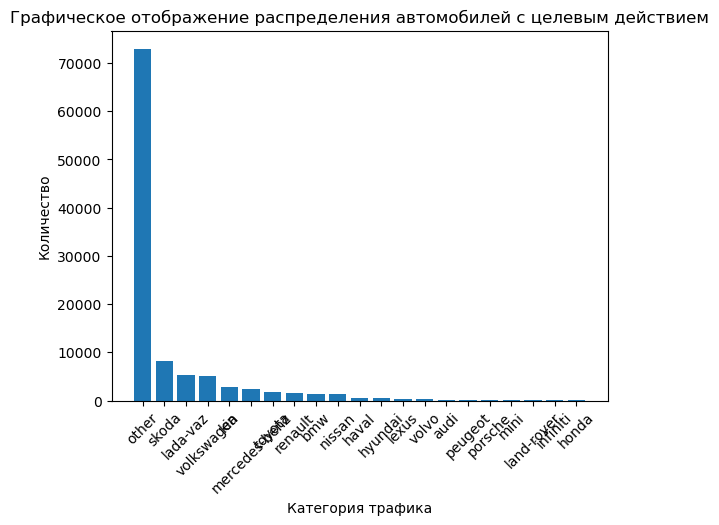

In [204]:
plt.bar(car.keys(), car.values())
plt.xlabel('Категория трафика')
plt.xticks(rotation=45)
plt.ylabel('Количество')
plt.title('Графическое отображение распределения автомобилей с целевым действием')
plt.show()

Самый лучший показатель конверсии у автомобилей марок: 'Skoda', 'Lada-VAZ' и 'Volkswagen', т.к. эти автомобили наибольшее количество раз участвовали в целевом событии.

3. Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?

In [156]:
source =  df.pivot_table(index='utm_source', columns = 'target_action', aggfunc='size', fill_value=0)
source

target_action,0,1
utm_source,,
other_source,1429693,46293
social_network,252259,4021


In [157]:
CR_social = round(source[1][1]/all_traffic * 100, 2)
CR_other_source = round(source[1][0]/all_traffic * 100, 2)
print(f' CR трафика социальных сетей: {CR_social}%, CR трафика других каналов привлечения: {CR_other_source}%')

 CR трафика социальных сетей: 0.23%, CR трафика других каналов привлечения: 2.67%


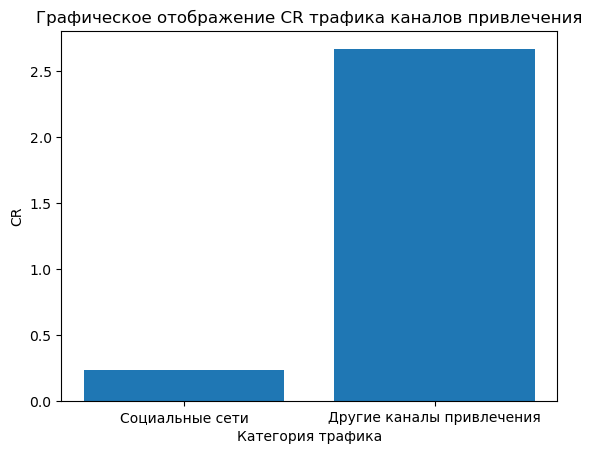

In [158]:
data_source = {'Социальные сети': 0.23, 'Другие каналы привлечения': 2.67}
plt.bar(data_source.keys(), data_source.values())
plt.xlabel('Категория трафика')
plt.ylabel('CR')
plt.title('Графическое отображение CR трафика каналов привлечения')
plt.show()

Показатель конверсии визитов из других каналов привлечения гораздо выше, чем этот же показатель в соцсетях.\
На сегодняшний день, соцсети являются хорошим источником рекламы, очень много людей пользуются ими ежедневно, возможно стоит увеличить присутсвие в соцсетях, но для этого нужен более глубокий анализ целевого клиента.